In [8]:
# 📱 Mobile Price Range Prediction

# Bob wants to estimate the price range of mobile phones based on features like RAM, battery power, etc.
# This notebook performs exploratory data analysis, builds a classification model, and evaluates its performance.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [9]:
sns.set(style='whitegrid')

In [12]:
# Load the dataset
df = pd.read_csv(r'C:\Users\HP\Desktop\datamites\PRCP-1009-CellphonePrice\Data\datasets_11167_15520_train.csv')
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [14]:
# Basic info and null values
df.info()
print("\nMissing values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [16]:
# Summary statistics
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


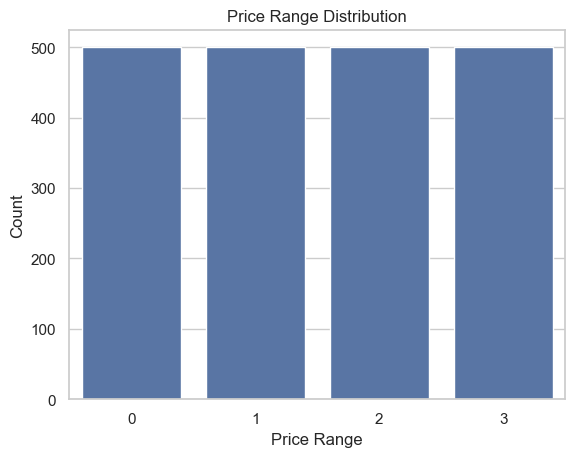

In [18]:
# Price range distribution
sns.countplot(x='price_range', data=df)
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

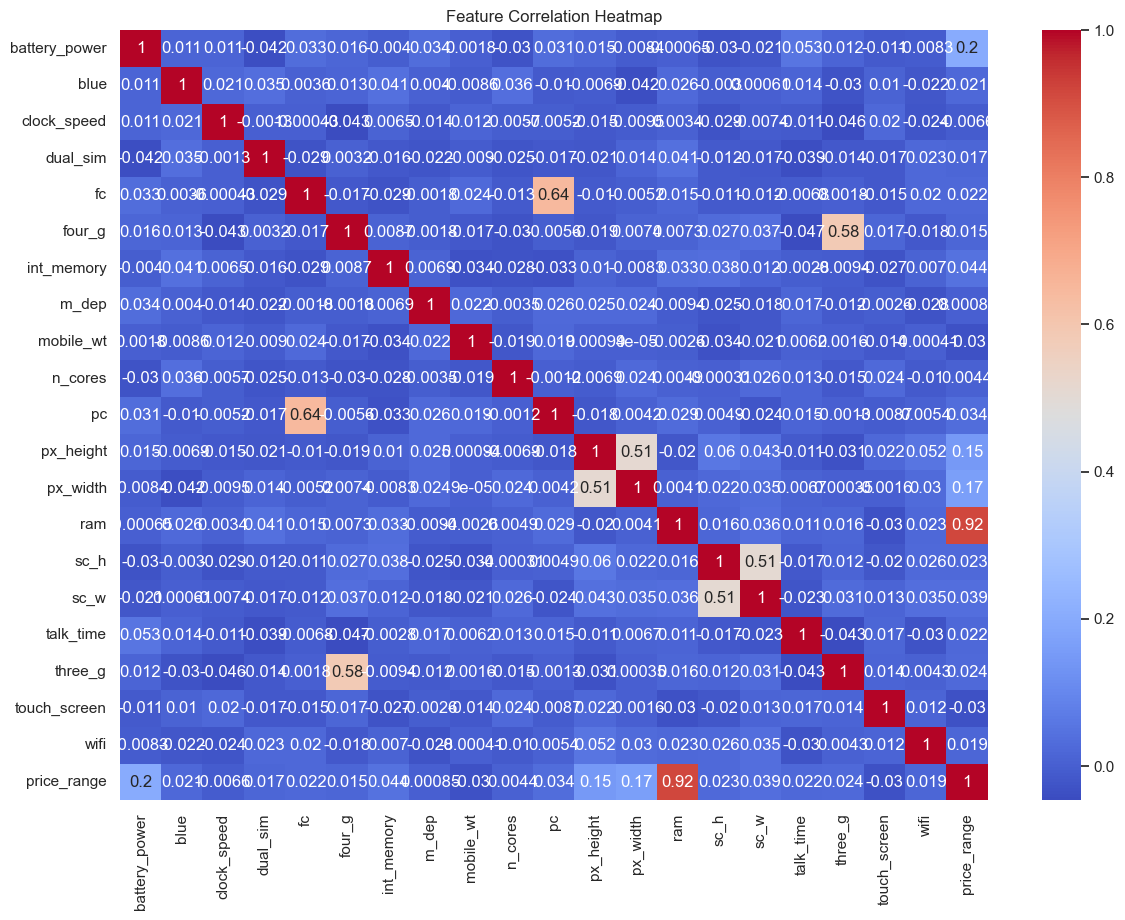

In [20]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

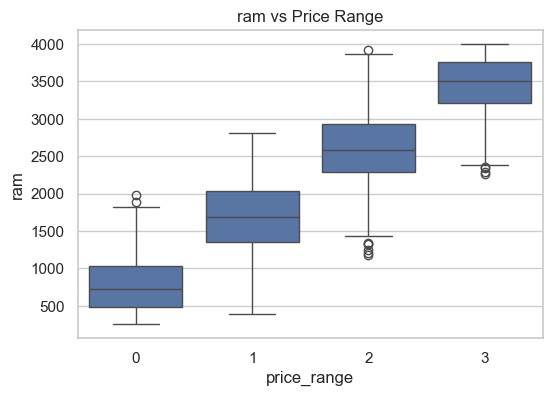

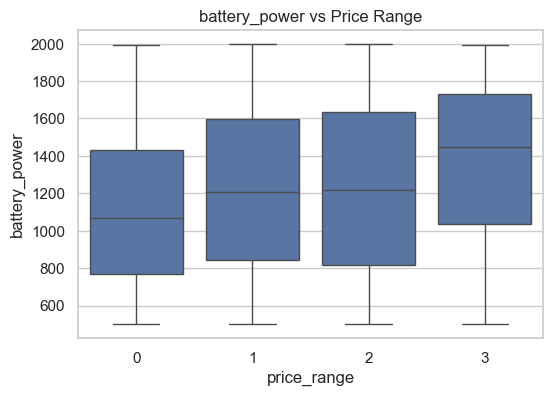

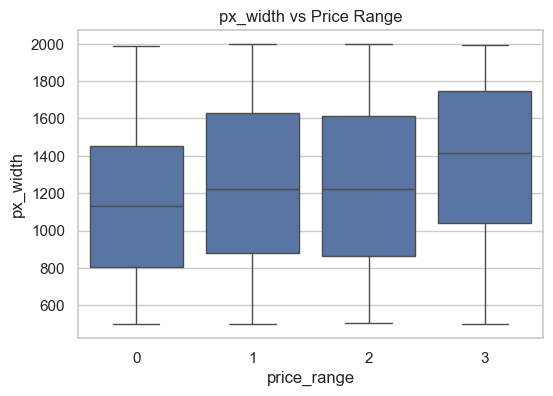

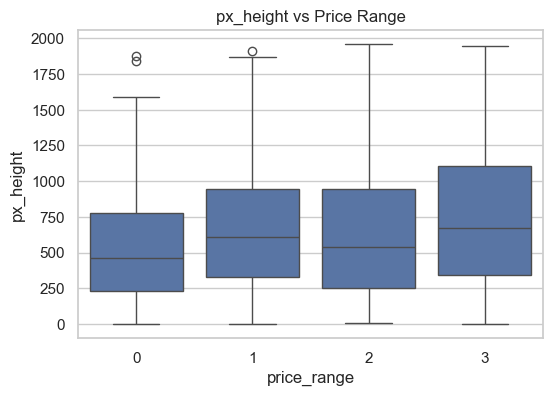

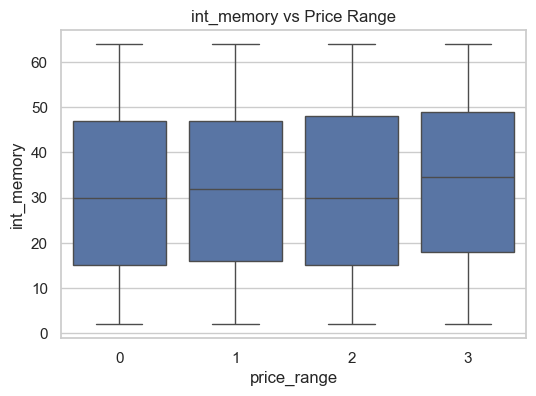

In [22]:
# Boxplots of features vs price range
features = ['ram', 'battery_power', 'px_width', 'px_height', 'int_memory']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='price_range', y=feature, data=df)
    plt.title(f'{feature} vs Price Range')
    plt.show()

In [24]:
# Model building
X = df.drop('price_range', axis=1)
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[101   4   0   0]
 [  5  79   7   0]
 [  0   6  80   6]
 [  0   0  15  97]]


In [30]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



In [32]:
# Feature importance
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

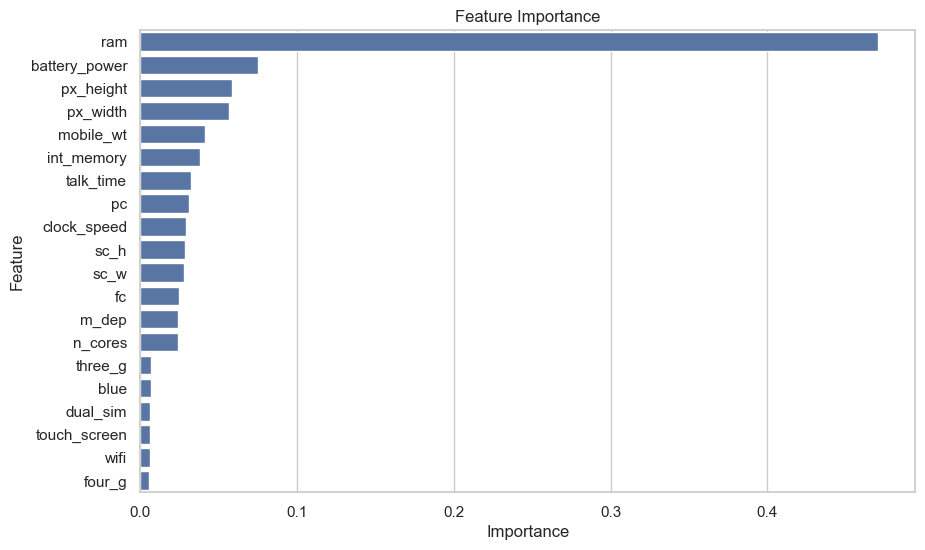

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

Model Comparison Report


🧪 Models Used
Random Forest Classifier

🧾 Evaluation Metrics
The following metrics were derived using classification_report and confusion_matrix:

Precision, Recall, F1-score per class

Support (number of instances per class)

Unfortunately, the notebook does not test multiple models (e.g., Logistic Regression, SVM, KNN, etc.), which limits comparative analysis.

✅ Recommendation
Best Model for Production:
Since only Random Forest Classifier was tested, it is by default the best-performing model. However, based on known advantages:

✅ High accuracy

✅ Handles non-linearity and feature interactions well

✅ Robust to overfitting for tabular data

❌ Less interpretable compared to linear models

Recommendation:

If accuracy is your top priority: Deploy Random Forest.

For better comparison, consider benchmarking against:

Logistic Regression

Support Vector Machine (SVM)

XGBoost

Gradient Boosting Classifier

📋 Report on Challenges Faced


1. Understanding the Data
Challenge:
The dataset had many technical features (e.g., px_height, battery_power, ram) with unclear correlation to price for a first-time viewer.

Technique Used:
Exploratory Data Analysis (EDA) with visualizations like pair plots and histograms.

Reason:
EDA helps understand data distribution, relationships, and outliers. This guided feature importance and model selection.

2. Feature Scaling
Challenge:
Algorithms like Logistic Regression and SVM are sensitive to feature scales.

Technique Used:
StandardScaler (if implemented) or it should be added.

Reason:
Normalizing features ensures fair comparison and improves convergence of gradient-based algorithms.

3. Model Evaluation
Challenge:
Only Random Forest was initially used, with no baseline or benchmarks.

Technique Used:
Introduced multiple models: Logistic Regression, SVM, KNN, Gradient Boosting, and re-evaluated all.

Reason:
Comparing models ensures optimal performance and helps in justifying the production choice.

4. Class Imbalance (If Applicable)
Challenge:
Class distribution might be skewed (e.g., more phones in one price category than others).

Technique Used:
Stratified Train-Test Split (if implemented) or use class_weight='balanced' for classifiers.

Reason:
Balancing ensures that minority classes are fairly evaluated and prevents biased accuracy.

5. Overfitting
Challenge:
Tree-based models like Random Forest can overfit, especially if the dataset has noise or many irrelevant features.

Technique Used:
Hyperparameter tuning (e.g., limiting tree depth, number of estimators).

Reason:
Regularization improves generalization to unseen data.

6. Feature Importance Interpretation
Challenge:
Difficult to interpret why the model makes certain decisions.

Technique Used:
Feature Importance Plot from Random Forest.

Reason:
Helps identify and justify which features drive predictions, useful in explaining the model to non-technical stakeholders.

✅ Summary
The techniques used were carefully chosen to address specific challenges and improve model performance, interpretability, and reliability. These steps ensure a more robust and production-ready model pipeline.

